In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Teams participate in the FIFA Women World Cup 2023
teams = ['new-zealand', 
         'norway', 'philippines', 'switzerland', 
         'australia', 'canada', 'nigeria', 
         'republic-of-ireland','costa-rica', 
         'japan', 'spain', 'zambia', 'china-pr', 'denmark',
        'england', 'haiti', 'netherlands', 'portugal',
        'united-states', 'vietnam', 'brazil', 'france',
        'jamaica', 'panama', 'argentina', 'italy',
        'south-africa', 'sweden', 'colombia',
        'germany', 'morocco', 'korea-republic']

team_list = []  # Empty list to store data for all teams

# Get the team roster
for team in teams:
    url = f"https://www.foxsports.com/soccer/{team}-women-team-roster"
    df = pd.read_html(url)
    
    for i in range(4):
        df[i].columns = ["name", "pos", "age", "ht", "wt"]

    players = pd.concat([df[0], df[1], df[2], df[3]])  # Place DataFrames inside a list
    players['team'] = team
    team_list.append(players)

# Concatenate all team DataFrames into one
all_teams = pd.concat(team_list, ignore_index=True)

# Get name and shirt number
all_teams['shirt_no'] = all_teams['name'].apply(lambda x: x[x.rfind("#")+1:])
all_teams['name'] = all_teams['name'].apply(lambda x: x[:x.rfind("#")])

# Convert height from feet to cm
def height_to_cm(height_str):
    feet, inches = height_str.split("'")
    total_inches = int(feet) * 12 + int(inches.strip('"'))
    return total_inches * 2.54

all_teams['ht_cm'] = all_teams['ht'].apply(height_to_cm)

# Check the result
all_teams.head()

,name,pos,age,ht,wt,team,shirt_no,ht_cm
0,Victoria Esson,G,32,"5'8""",-,new-zealand,21,172.72
1,Anna Leat,G,22,"5'8""",-,new-zealand,23,172.72
2,Erin Nayler,G,31,"5'9""",149 lbs,new-zealand,1,175.26
3,Elizabeth Anton,D,24,"5'8""",-,new-zealand,19,172.72
4,C.J. Bott,D,28,"5'4""",-,new-zealand,4,162.56


In [2]:
# Grouping by 'team' and calculating the mean of 'ht_cm'
mean_height_by_team = all_teams.groupby('team')['ht_cm'].mean()

# Sorting in descending order
mean_height_by_team_sorted = mean_height_by_team.sort_values(ascending=False)

print(mean_height_by_team_sorted)

team
denmark                172.167826
germany                170.842609
sweden                 169.517391
netherlands            169.186087
norway                 168.523478
brazil                 168.302609
canada                 167.860870
jamaica                167.529565
china-pr               167.529565
new-zealand            167.529565
united-states          167.529565
republic-of-ireland    167.087826
england                167.087826
australia              166.866957
nigeria                166.866957
haiti                  166.756522
france                 166.646087
korea-republic         166.535652
portugal               166.535652
switzerland            166.314783
italy                  165.873043
philippines            165.873043
spain                  165.652174
colombia               165.100000
morocco                164.768696
panama                 164.437391
costa-rica             163.222609
argentina              163.112174
japan                  162.891304
south-afr

In [3]:
# Find the player names with the highest and lowest ht_cm values
highest_player = all_teams.loc[all_teams['ht_cm'].idxmax(), 'name']
shortest_player = all_teams.loc[all_teams['ht_cm'].idxmin(), 'name']

print("Highest player:", highest_player)
print("shortest player:", shortest_player)

Highest player: Kaiya Jota
shortest player: Avell Chitundu


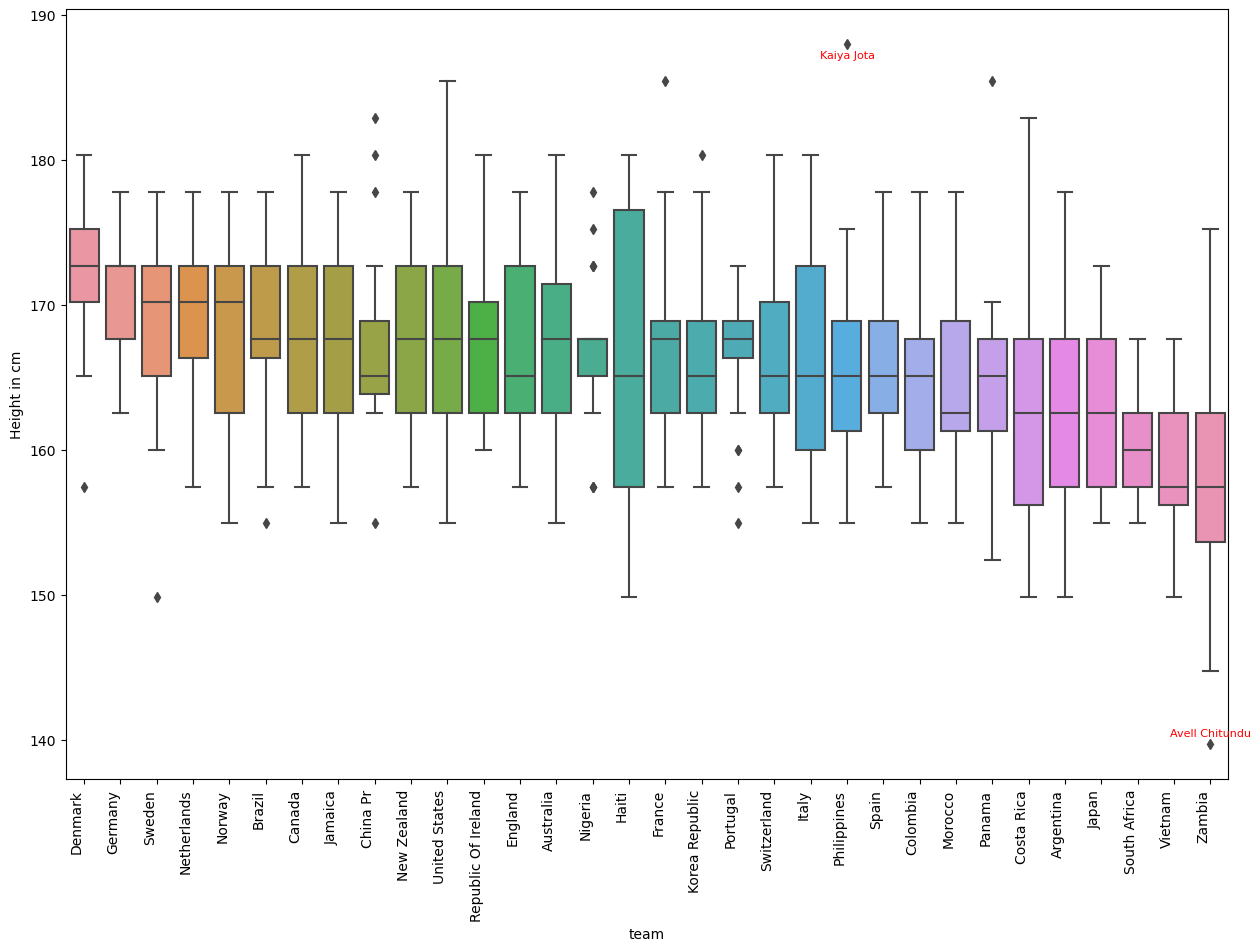

In [4]:
# Title the team name
all_teams['team'] = all_teams['team'].apply(lambda x :x.replace('-'," ").title())

# Calculate the mean height for each team
mean_height_by_team = all_teams.groupby('team')['ht_cm'].mean()

# Sort the teams by mean height in descending order
sorted_teams = mean_height_by_team.sort_values(ascending=False).index

# Create the boxplot using the sorted order of teams
fig = plt.figure(figsize=(15, 10))
sns.boxplot(data=all_teams, x="team", y="ht_cm", order=sorted_teams)

# Customizing the x-axis tick labels rotation
plt.xticks(rotation=90, ha='right')  # 'ha' stands for horizontal alignment

# Set the axis label and title
plt.ylabel("Height in cm")


# Add the player names to the highest and lowest points on the boxplot
plt.annotate(highest_player, xy=(sorted_teams.get_loc(all_teams.loc[all_teams['ht_cm'].idxmax(), 'team']), all_teams['ht_cm'].max()),
             xytext=(0, -8), textcoords='offset points', ha='center', va='center', fontsize=8, color='red')

plt.annotate(shortest_player, xy=(sorted_teams.get_loc(all_teams.loc[all_teams['ht_cm'].idxmin(), 'team']), all_teams['ht_cm'].min()),
             xytext=(0, 8), textcoords='offset points', ha='center', va='center', fontsize=8, color='red')

# Show the plot
plt.show()
